# NumPy-Based Artificial Neural Network (ANN) for Handwritten Digit Classification

This project implements an artificial neural network (ANN) using only the NumPy library and calculus. The goal is to classify greyscale 28x28 images of different handwritten digits from the MNIST dataset.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(120) # Set seed for reproducable results

In [3]:
class NumberClassifierANN():
    """
    A class that implements an artificial neural network (ANN) for number classification, achieving an impressive accuracy score of 91% on previously unseen data.

    Attributes:
        W1 (ndarray): Weight matrix for the first layer.
        B1 (ndarray): Bias matrix for the first layer.
        W2 (ndarray): Weight matrix for the second layer.
        B2 (ndarray): Bias matrix for the second layer.
        W3 (ndarray): Weight matrix for the third layer.
        B3 (ndarray): Bias matrix for the third layer.
        learningRate (float): Learning rate for gradient descent.
        trainData (ndarray): Transposed feature matrix of the training data.
        trainDataLabels (ndarray): Labels of the training data.
        testData (ndarray): Transposed feature matrix of the test data.
        testDataLabels (ndarray): Labels of the test data.
        r (int): Number of rows in the training data.
        n (int): Number of columns in the training data.
    """
    
    def __init__(self, learningRate = 1.5):
        """
        Initialize the neural network model.
        """

        # Initialize weights and biases for three layers
        self.W1 = np.random.rand(10, 784) - 0.5 
        self.B1 = np.random.rand(10, 1) - 0.5
        self.W2 = np.random.rand(10, 10) - 0.5
        self.B2 = np.random.rand(10, 1) - 0.5
        self.W3 = np.random.rand(10, 10) - 0.5
        self.B3 = np.random.rand(10, 1) - 0.5

        self.learningRate = learningRate  # Set the learning rate
        self.import_dataset()  # Call the import_dataset() method
        self.plot_data = {}

    def import_dataset(self):
        """
        Load train and test data from CSV files and preprocess them.
         """
        
        # Load train and test data from CSV files
        trainData = pd.read_csv("mnist_train.csv")
        testData = pd.read_csv("mnist_test.csv")

        self.r, self.n = trainData.shape  # Get the number of rows and columns in the train data
        self.trainDataLabels = np.array(trainData)[:, 0]  # Extract the labels from train data
        self.trainData = np.array(trainData)[:, 1:].T / 255  # Extract the features from train data and normalize

        self.testDataLabels = np.array(testData)[:, 0]  # Extract the labels from test data
        self.testData = np.array(testData)[:, 1:].T / 255  # Extract the features from test data and normalize

    
    def ReLU(self, Z):
        """
        Returns matrix Z with the ReLU activation function applied to all elements
        """
        return np.maximum(Z, 0)

    def sigmoid(self, Z):
        """
        Returns matrix Z with the Sigmoid activation function applied to all elements
        """
        return 1 / (1 + np.exp(-Z))

    def sigmoid_deriv(self, Z):
        """
        Returns matrix Z with the derivative of the Sigmoid activation function applied to all elements
        """
        return (self.sigmoid(Z) * (1 - self.sigmoid(Z)))

    def ReLU_deriv(self, Z):
        """
        Returns matrix Z with the derivative of the ReLU activation function applied to all elements
        """
        return Z > 0
    
    def one_hot_encode(self, labels):
        """
        Perform one-hot encoding of labels.
        """
        return np.eye(10)[labels].T

    def forward_prop(self, data):
        """
        Perform forward propagation to compute activations for each layer.
        """
        self.Z1 = self.W1.dot(data) + self.B1 
        self.A1 = self.ReLU(self.Z1) # Apply ReLU activation
        self.Z2 = self.W2.dot(self.A1) + self.B2 
        self.A2 = self.ReLU(self.Z2) # Apply ReLU activation
        self.Z3 = self.W3.dot(self.A2) + self.B3 
        self.A3 = self.sigmoid(self.Z3) # Apply sigmoid activation

    
    def back_prop(self, data, labels):
        """
        Perform backpropagation to compute gradients for weight and bias parameters.
        """
        # Convert labels to one-hot encoding
        oneHotLabels = self.one_hot_encode(labels)
        
        # Compute cost
        cost = self.A3 - oneHotLabels
        
        # Compute gradients for third layer
        self.dZ3 = cost * self.sigmoid_deriv(self.Z3) 
        self.dW3 = (1 / self.r) * self.dZ3.dot(self.A2.T) # Compute gradient of weight W3
        
        # Compute gradients for second layer
        self.dZ2 = self.W3.T.dot(self.dZ3) * self.ReLU_deriv(self.Z2) 
        self.dW2 = (1 / self.r) * self.dZ2.dot(self.A1.T) # Compute gradient of weight W2
        
        # Compute gradients for first layer
        self.dZ1 = self.W2.T.dot(self.dZ2) * self.ReLU_deriv(self.Z1) 
        self.dW1 = (1 / self.r) * self.dZ1.dot(data.T) # Compute gradient of weight W1
        
        # Compute gradients for biases
        self.dB3 = (1 / self.r) * np.sum(self.dZ3) # Compute gradient of bias B3
        self.dB2 = (1 / self.r) * np.sum(self.dZ2) # Compute gradient of bias B2
        self.dB1 = (1 / self.r) * np.sum(self.dZ1) # Compute gradient of bias B1


    def update_params(self):
        """
        This method updates the weights and biases of the neural network using the computed gradients
        and the learning rate.
        """
        # Update weights using gradients and learning rate
        self.W1 -= self.learningRate * self.dW1 
        self.W2 -= self.learningRate * self.dW2 
        self.W3 -= self.learningRate * self.dW3 

        # Update biases using gradients and learning rate
        self.B1 -= self.learningRate * self.dB1 
        self.B2 -= self.learningRate * self.dB2 
        self.B3 -= self.learningRate * self.dB3 

    
    def gradient_descent(self, data, labels, epochs):
        """
        Perform gradient descent optimization for training the neural network.
        """
        for epoch in range(epochs):
            self.forward_prop(data)
            self.back_prop(data, labels)
            self.update_params()

            if epoch % 100 == 0:
                print(f"Accuracy: {np.round(self.get_accuracy(self.A3, labels), decimals=4)} Epoch: {epoch}")

            if epoch % 50 == 0:
                self.plot_data[epoch] = self.get_accuracy(self.A3, labels)

        print(f"Accuracy: {np.round(self.get_accuracy(self.A3, labels), decimals=4)} Epoch: {epochs}")

    
    def get_predictions(self, prediction):
        """
        Get predicted labels from the output of the neural network.
        """
        return np.argmax(prediction, 0)


    def get_accuracy(self, predictions, labels):
        """
        Calculate the accuracy of the neural network predictions.
        """
        return np.sum(self.get_predictions(predictions) == labels) / labels.size


    def make_predictions(self, data):
        """
        Make predictions using the trained neural network.
        """
        self.forward_prop(data)
        predictions = self.get_predictions(self.A3)
        return predictions


    def make_predictions_on_test_dataset(self):
        """
        Makes predictions using the forward_prop function and then compares to the actual answers in the test dataset
        """
        print(f"Accuracy on unseen test data: {np.sum(self.make_predictions(numberANN.testData) == self.testDataLabels) / self.testDataLabels.size}")
    
    def plot_accuracy(self):
        """
        Visualise the progression of accuracy with increasing epochs during training
        """
        epochs = list(self.plot_data.keys())
        accuracies = list(self.plot_data.values())

        plt.plot(epochs, accuracies)
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.title('Epoch vs. Accuracy')
        plt.grid(True)
        plt.show()

Accuracy: 0.1229 Epoch: 0
Accuracy: 0.6491 Epoch: 100
Accuracy: 0.7964 Epoch: 200
Accuracy: 0.8512 Epoch: 300
Accuracy: 0.8764 Epoch: 400
Accuracy: 0.8903 Epoch: 500
Accuracy: 0.8993 Epoch: 600
Accuracy: 0.905 Epoch: 700
Accuracy: 0.9094 Epoch: 800
Accuracy: 0.9131 Epoch: 900
Accuracy: 0.9171 Epoch: 1000
Accuracy on unseen test data: 0.916


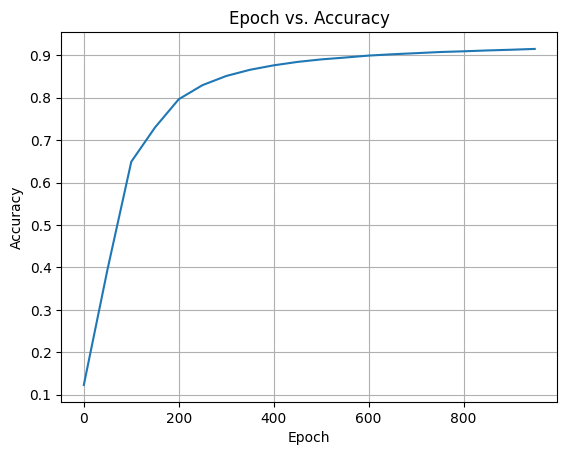

In [4]:
numberANN = NumberClassifierANN()
numberANN.import_dataset()
numberANN.gradient_descent(numberANN.trainData, numberANN.trainDataLabels, 1000)
numberANN.make_predictions_on_test_dataset()
numberANN.plot_accuracy() # Plot accuracy over epochs